<h1 style="color:rgb(70,130,180);">COVID-19 Exploratory Data Analysis</h1>

## Group memebers:

1. **Nikhil Waghalkar (I23020) (GL)**
2. **Sayen Das        (I23028)**  
3. **Lawrence Jadon   (I23014)**
4. **Sanjay Jaiswal   (I23025)**


---

<h3>Description:</h3>
<p>Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardio - vascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
    
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and the proper plannning to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.</p>

<h3>Dataset explaination:</h3>
<p>The dataset was provided by the Mexican government. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.</p>

* **sex:** 1 for female and 2 for male.
* **age:** of the patient.
* **classification:** covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* **patient type:** type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* **pneumonia:** whether the patient already have air sacs inflammation or not.
* **pregnancy:** whether the patient is pregnant or not.
* **diabetes:** whether the patient has diabetes or not.
* **copd:** Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* **asthma:** whether the patient has asthma or not.
* **inmsupr:** whether the patient is immunosuppressed or not.
* **hypertension:** whether the patient has hypertension or not.
* **cardiovascular:** whether the patient has heart or blood vessels related disease.
* **renal chronic:** whether the patient has chronic renal disease or not.
* **other disease:** whether the patient has other disease or not.
* **obesity:** whether the patient is obese or not.
* **tobacco:** whether the patient is a tobacco user.
* **usmer:** Indicates whether the patient treated medical units of the first, second or third level.
* **medical unit:** type of institution of the National Health System that provided the care.
* **intubed	:** whether the patient was connected to the ventilator.
* **icu:** Indicates whether the patient had been admitted to an Intensive Care Unit.
* **date died:** If the patient died indicate the date of death, and 9999-99-99 otherwise.

---

<h3>Importing required labraries:</h3>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

<h3>Setting some configurations for better experiance:</h3>

In [2]:
pd.set_option('display.max_columns',None)  # To Display all columns.
pd.set_option('display.max_colwidth',100)   # To set default column width.
pd.set_option('display.float_format', lambda x: f'{x:.1f}')  # To Supress the scientific notation of values.
sns.set_style("darkgrid")   # To set darkgrid as defaut plot style.

<h3>Loading and Display dataset:</h3>

In [3]:
dataset = pd.read_csv("Covid Data.csv")
dataset.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In the first glance we can see there are some values that make no sense i.e. 97 will look into it more.

In [4]:
dataset.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,2,2,2,2,2,2,2,2,2,7,97


Now we can see we have more such values i.e. (9999-99-99 and 97) will look into it more.

In [5]:
dataset.columns = [col.lower() for col in dataset.columns]  # Converting the columns name in lower case
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")
print("\nColumns have following data types:")
dataset.dtypes  # Checking data type of all columns.

Dataset has 1048575 rows and 21 columns

Columns have following data types:


usmer                    int64
medical_unit             int64
sex                      int64
patient_type             int64
date_died               object
intubed                  int64
pneumonia                int64
age                      int64
pregnant                 int64
diabetes                 int64
copd                     int64
asthma                   int64
inmsupr                  int64
hipertension             int64
other_disease            int64
cardiovascular           int64
obesity                  int64
renal_chronic            int64
tobacco                  int64
clasiffication_final     int64
icu                      int64
dtype: object

---

<h3>Summary statastics of columns in dataset:</h3>

In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
usmer,1048575.0,1.6,0.5,1.0,1.0,2.0,2.0,2.0
medical_unit,1048575.0,9.0,3.7,1.0,4.0,12.0,12.0,13.0
sex,1048575.0,1.5,0.5,1.0,1.0,1.0,2.0,2.0
patient_type,1048575.0,1.2,0.4,1.0,1.0,1.0,1.0,2.0
intubed,1048575.0,79.5,36.9,1.0,97.0,97.0,97.0,99.0
pneumonia,1048575.0,3.3,11.9,1.0,2.0,2.0,2.0,99.0
age,1048575.0,41.8,16.9,0.0,30.0,40.0,53.0,121.0
pregnant,1048575.0,49.8,47.5,1.0,2.0,97.0,97.0,98.0
diabetes,1048575.0,2.2,5.4,1.0,2.0,2.0,2.0,98.0
copd,1048575.0,2.3,5.1,1.0,2.0,2.0,2.0,98.0


By looking into summary it is very evident that "age" column having many higher extreme values in it.

<h3>Checking count of all distinct classes in the column:</h3>

In [7]:
for i in dataset.columns:
    print(dataset[i].value_counts().sort_index(ascending=False))
    print("---------------------------------------------------")

usmer
2    662903
1    385672
Name: count, dtype: int64
---------------------------------------------------
medical_unit
13       996
12    602995
11      5577
10      7873
9      38116
8      10399
7        891
6      40584
5       7244
4     314405
3      19175
2        169
1        151
Name: count, dtype: int64
---------------------------------------------------
sex
2    523511
1    525064
Name: count, dtype: int64
---------------------------------------------------
patient_type
2    200031
1    848544
Name: count, dtype: int64
---------------------------------------------------
date_died
9999-99-99    971633
31/10/2020         1
31/08/2020         5
31/07/2020       139
31/05/2020       776
               ...  
01/04/2020        56
01/03/2020        11
01/02/2021         1
01/02/2020        13
01/01/2021         1
Name: count, Length: 401, dtype: int64
---------------------------------------------------
intubed
99      7325
97    848544
2     159050
1      33656
Name: count, dtype:

From the above result we can understand values like 97, 98, 99 missing values and 9999-99-99 is default date value.

---

<h3>Handling missing values:</h3>

In [8]:
def check_missing_value(data):
    for col in data.columns:
        x = data.loc[data[col] == 97, col].count()
        y = data.loc[data[col] == 98, col].count()
        z = data.loc[data[col] == 99, col].count()
        print(f"{col}:")
        print(f"Count of 97 = {x}")
        print(f"Count of 98 = {y}")
        print(f"Count of 99 = {z}")
        print(f"Total null count (% of Total) = {x+y+z } ({(((x+y+z)/data[col].count())*100).round(2)}%)")
        print("----------------------------------------------------------")
        
check_missing_value(dataset)

usmer:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
medical_unit:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
sex:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
patient_type:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
date_died:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
intubed:
Count of 97 = 848544
Count of 98 = 0
Count of 99 = 7325
Total null count (% of Total) = 855869 (81.62%)
----------------------------------------------------------
pneumonia:
Count of 97 = 0
Count of 9

<h4>Lets check now intubed, pregnant and icu to see what is happing over there because those columns has many missing values.</h4>

In [9]:
dataset.groupby(['intubed', 'patient_type'],dropna=False)['patient_type'].count()

intubed  patient_type
1        2                33656
2        2               159050
97       1               848544
99       2                 7325
Name: patient_type, dtype: int64

In [10]:
dataset.groupby(['icu', 'patient_type'],dropna=False)['patient_type'].count()

icu  patient_type
1    2                16858
2    2               175685
97   1               848544
99   2                 7488
Name: patient_type, dtype: int64

- Both columns have relation with 'patient_type' column.
- The values 97 are of patients return to home.
- Let's drop these columns, because are so many missing values.

In [11]:
dataset.groupby(['pregnant', 'sex'],dropna=False)['sex'].count()

pregnant  sex
1         1        8131
2         1      513179
97        2      523511
98        1        3754
Name: sex, dtype: int64

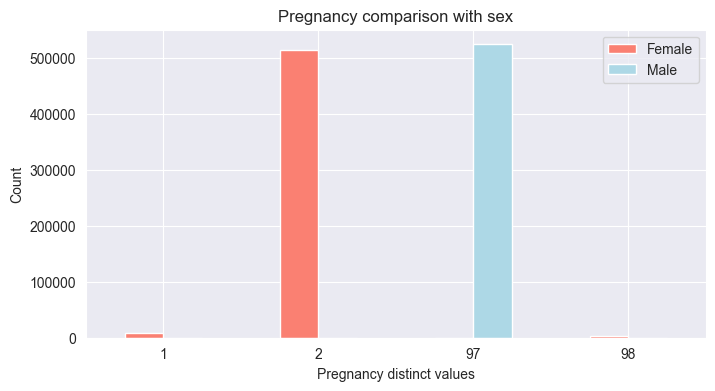

In [12]:
# Checking the count of unique vales of pregnant field on the basis of sex.
pd.crosstab(dataset.pregnant, dataset.sex,dropna = False).plot(kind="bar", figsize=(8,4), color=["salmon","lightblue"])
plt.title("Pregnancy comparison with sex")
plt.xlabel("Pregnancy distinct values")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

As we can see in above cell all the records containing 97 as the value is of male and male can't get pregnant so moving all these records to not pregnant(2 value)

In [13]:
dataset.pregnant = dataset.pregnant.replace(97, 2)
dataset.pregnant.value_counts()

pregnant
2     1036690
1        8131
98       3754
Name: count, dtype: int64

<h4>Creating new data set by removing "intubed" and "icu"columns </h4>

In [14]:
dataset_new = dataset.drop(columns=["intubed","icu"])  # Removing intubed and icu columns as it has more than 50% of nulls.
dataset_new.head()

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3


In [15]:
for col in dataset_new.columns:
    if col != "age":
        dataset_new.drop(dataset_new.index[(dataset_new[col] == 97) | (dataset_new[col] == 98) |(dataset_new[col] == 99)], axis=0, inplace=True)
    else:
        pass

In [16]:
check_missing_value(dataset_new)  # checking finally missing value count.

usmer:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
medical_unit:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
sex:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
patient_type:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
date_died:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
pneumonia:
Count of 97 = 0
Count of 98 = 0
Count of 99 = 0
Total null count (% of Total) = 0 (0.0%)
----------------------------------------------------------
age:
Count of 97 = 128
Count of 98 = 115
Count of 

Age values 97,98 and 99 not considering missing in this case age may be one of this value.

---

<h4>Analyzing date_died field</h4>

In [17]:
dataset_new['date_died'].value_counts()

date_died
9999-99-99    947320
06/07/2020       984
07/07/2020       981
13/07/2020       969
16/06/2020       965
               ...  
27/02/2021         1
26/02/2021         1
20/02/2021         1
11/02/2021         1
22/04/2021         1
Name: count, Length: 395, dtype: int64

In [18]:
dataset_new['died'] = [2 if i=='9999-99-99' else 1 for i in dataset_new.date_died] #Creating a new column 'died'

In [19]:
# Now we can remove the date_died field
dataset_new.drop('date_died', axis=1, inplace=True)
dataset_new.sample(2)

,usmer,medical_unit,sex,patient_type,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
659125,2,12,1,1,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2
689989,2,12,2,1,2,21,2,2,2,2,2,2,2,2,2,2,1,6,2


---

<h3>Exploring more:</h3>

<h4> Death column proportion</h4>

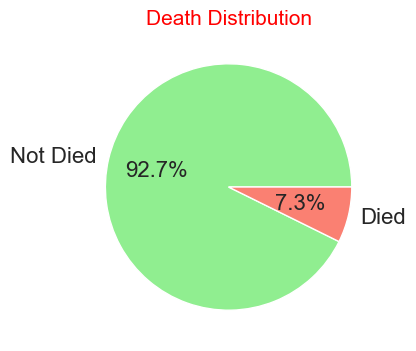

In [20]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.pie(
    dataset_new.died.value_counts().values, labels=['Not Died', 'Died'], autopct='%0.1f%%',
    startangle=0, textprops={'fontsize': 16}, wedgeprops={'edgecolor': '#fff'}, colors=["lightgreen", "salmon"]
)
ax.set_title('Death Distribution', fontsize=15, color='red')
plt.show()

We can see in the above graph that 92.7% patient has survived in covid 19 pandemic.

<h4>Age column distribution</h4>

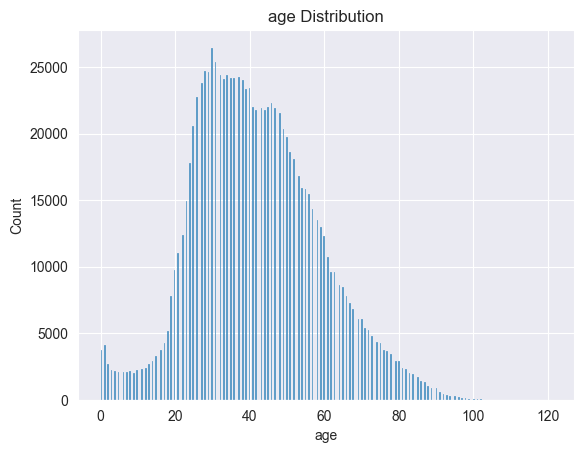

In [21]:
sns.histplot(x=dataset_new['age'])
plt.title("age Distribution")
plt.show()

Distribution is slightly right skewed because of higher extreme values.

<h4>Age distribution w.r.t died</h4>

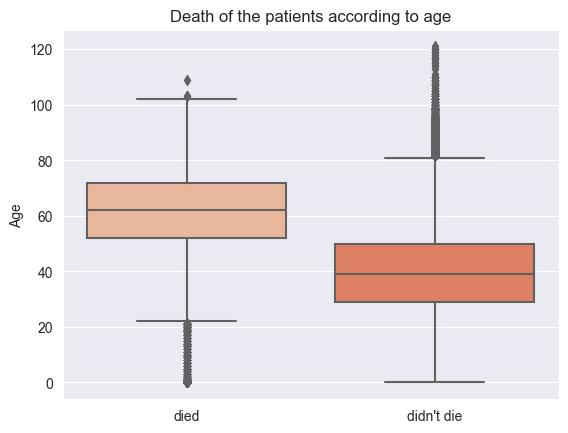

In [22]:
sns.boxplot(x="died", y="age",data=dataset_new,palette=sns.color_palette("rocket_r"))
plt.title("Death of the patients according to age")
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['died', 'didn\'t die'], fontsize=10)
plt.xlabel(None)
plt.ylabel('Age', fontsize=10);

**We can observe few points from the above plot :**
1. Most of the deaths occurs between 50 to 70 age.
2. But we can also see few patients with age between 0 and 20.

<h4>Age distribution w.r.t died and sex</h4>

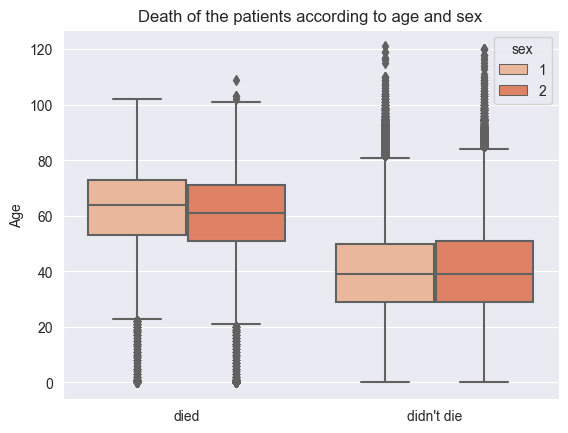

In [23]:
sns.boxplot(x="died", y="age",data=dataset_new,palette=sns.color_palette("rocket_r"), hue='sex')
plt.title("Death of the patients according to age and sex")
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['died', 'didn\'t die'], fontsize=10)
plt.xlabel(None)
plt.ylabel('Age', fontsize=10);

Not much of the difference for sex when comparing with age and death.

<h4>clasiffication_final field</h4>

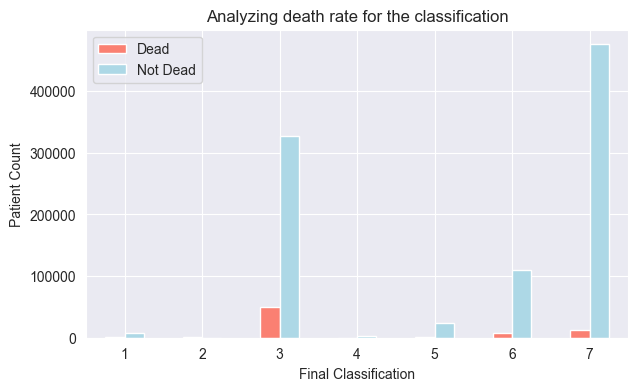

In [24]:
pd.crosstab(dataset_new.clasiffication_final, dataset_new.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate for the classification")
plt.xlabel("Final Classification")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

**`Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.`**

Above plot tells us that patients with classification id as 7 has very less chance of death as they are not the carrier of the virus.

#### sex field

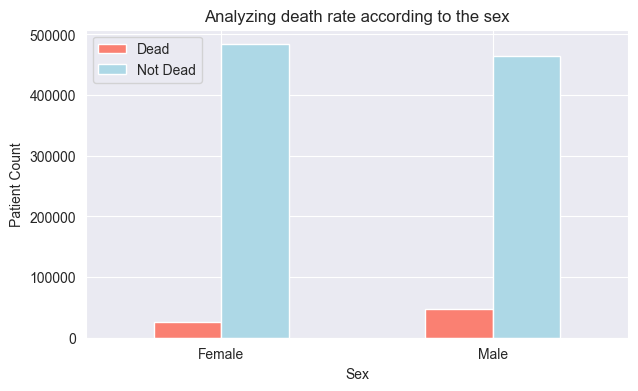

In [25]:
pd.crosstab(dataset_new.sex, dataset_new.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate according to the sex")
plt.xlabel("Sex")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Female', 'Male'], fontsize=10)
plt.xticks(rotation=0);

Death rate of males are more in comparison to females however female patients are slightly more than men patients.

#### diabetes field

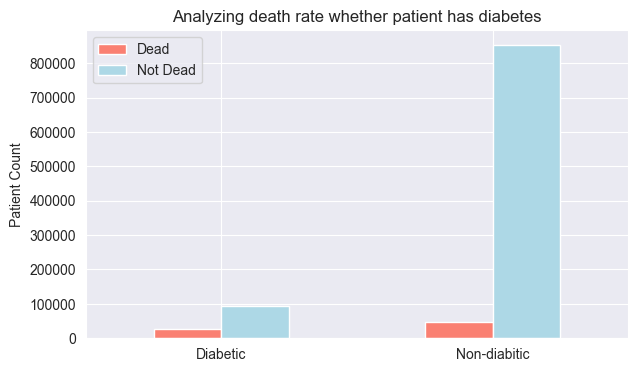

In [26]:
pd.crosstab(dataset_new.diabetes,dataset_new.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has diabetes")
plt.xlabel(None)
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Diabetic', 'Non-diabitic'], fontsize=10)
plt.xticks(rotation=0);

We can see that if patient is not having diabetes, there is more chance that he will not die.

#### asthma field

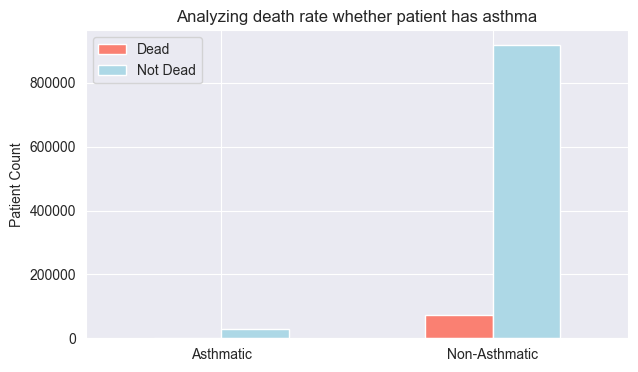

In [27]:
pd.crosstab(dataset_new.asthma, dataset_new.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has asthma")
plt.xlabel(None)
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Asthmatic', 'Non-Asthmatic'], fontsize=10)
plt.xticks(rotation=0);

We can see that if patient is not diagonized with Asthma, there is more chance that he will not die.

#### pneumonia field

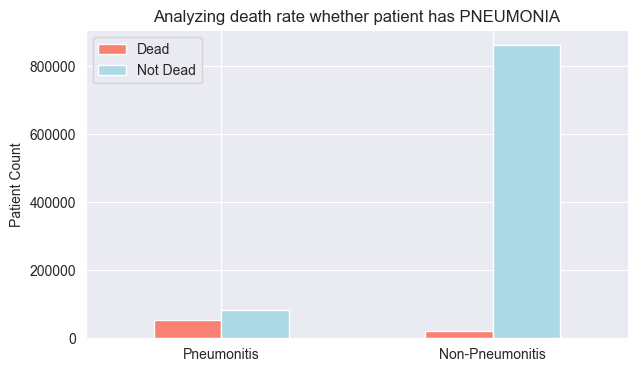

In [28]:
pd.crosstab(dataset_new.pneumonia, dataset_new.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has PNEUMONIA")
plt.xlabel(None)
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Pneumonitis', 'Non-Pneumonitis'], fontsize=10)
plt.xticks(rotation=0);

Death rate of pneumonia diagonized patients are more in comparison to others

#### Hypertension column

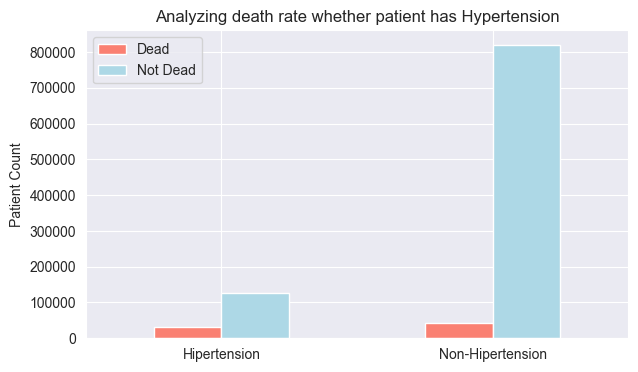

In [29]:
pd.crosstab(dataset_new.hipertension, dataset_new.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has Hypertension")
plt.xlabel(None)
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Hipertension', 'Non-Hipertension'], fontsize=10)
plt.xticks(rotation=0);

Death rate is found more in people having Hipertension.

#### Patient type column

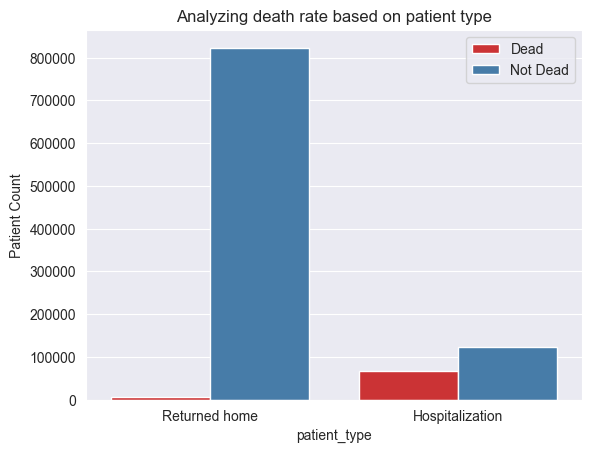

In [30]:
ax=sns.countplot(data=dataset_new,x='patient_type',hue='died',palette='Set1')
ax.set_ylabel("Patient Count")
ax.legend(["Dead", "Not Dead"])
ax.set_xticklabels(['Returned home', 'Hospitalization'])
plt.title("Analyzing death rate based on patient type")
plt.show()

Hospitalized people more prone to death as comapaired to retured home.

---

<h3>Outlier detection and handling in Age column:</h3>

In [31]:
age_1_99_percentile= dataset_new.loc[dataset_new['died']==1,'age'].quantile(0.99)
age_2_99_percentile = dataset_new.loc[dataset_new['died']==2,'age'].quantile(0.99)
print(f"99% of ages of people who died are below {age_1_99_percentile} \
and 99% of ages of people who didn't died are below {age_2_99_percentile}")

99% of ages of people who died are below 91.0 and 99% of ages of people who didn't died are below 82.0


<h4>Capturing outlier values to value at 99 percentile value</h4>

In [32]:
dataset_new.loc[(dataset_new['died']==1) & (dataset_new['age']>age_1_99_percentile),'age'] = age_1_99_percentile
dataset_new.loc[(dataset_new['died']==2) & (dataset_new['age']>age_2_99_percentile),'age'] = age_2_99_percentile

As per Winsorizing method we have imputed 99 percentile value of age by both died column classes 1 (died) and 2 (survied).

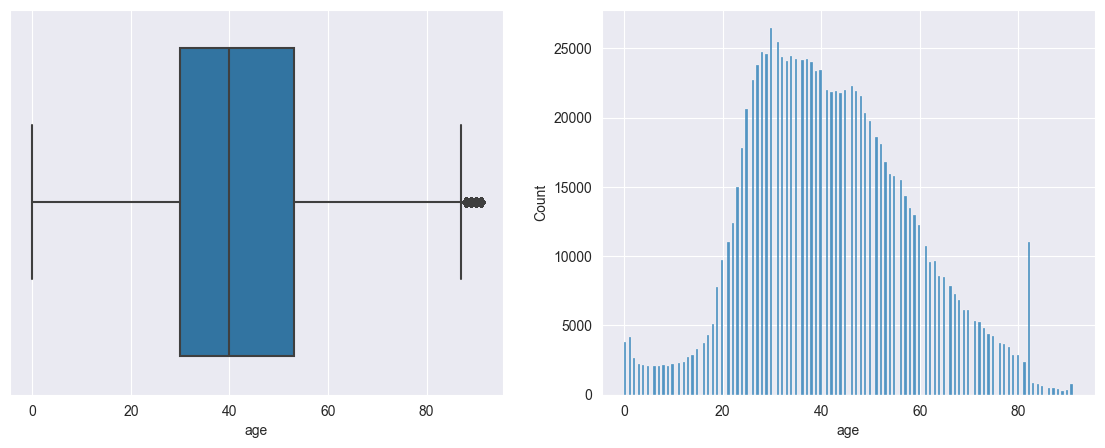

In [33]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(data=dataset_new,x='age',ax=ax[0])
sns.histplot(data=dataset_new,x='age',ax=ax[1])

plt.show()

Distribution of age looks good after replacing extreme values.

---

<h3>Finding relation among categocial variables:</h3>

In [34]:
dataset_new_cat = dataset_new.loc[::,['usmer', 'medical_unit', 'patient_type',
       'pneumonia', 'sex', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'died']]

In [35]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (np.sqrt(stat/(obs*mini))) # Cramers V formula

In [36]:
rows= []

for var1 in dataset_new_cat:
    col = []
    for var2 in dataset_new_cat :
        cramers =cramers_V(dataset_new_cat[var1], dataset_new_cat[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
corr_matrix = pd.DataFrame(cramers_results, columns = dataset_new_cat.columns, index =dataset_new_cat.columns)


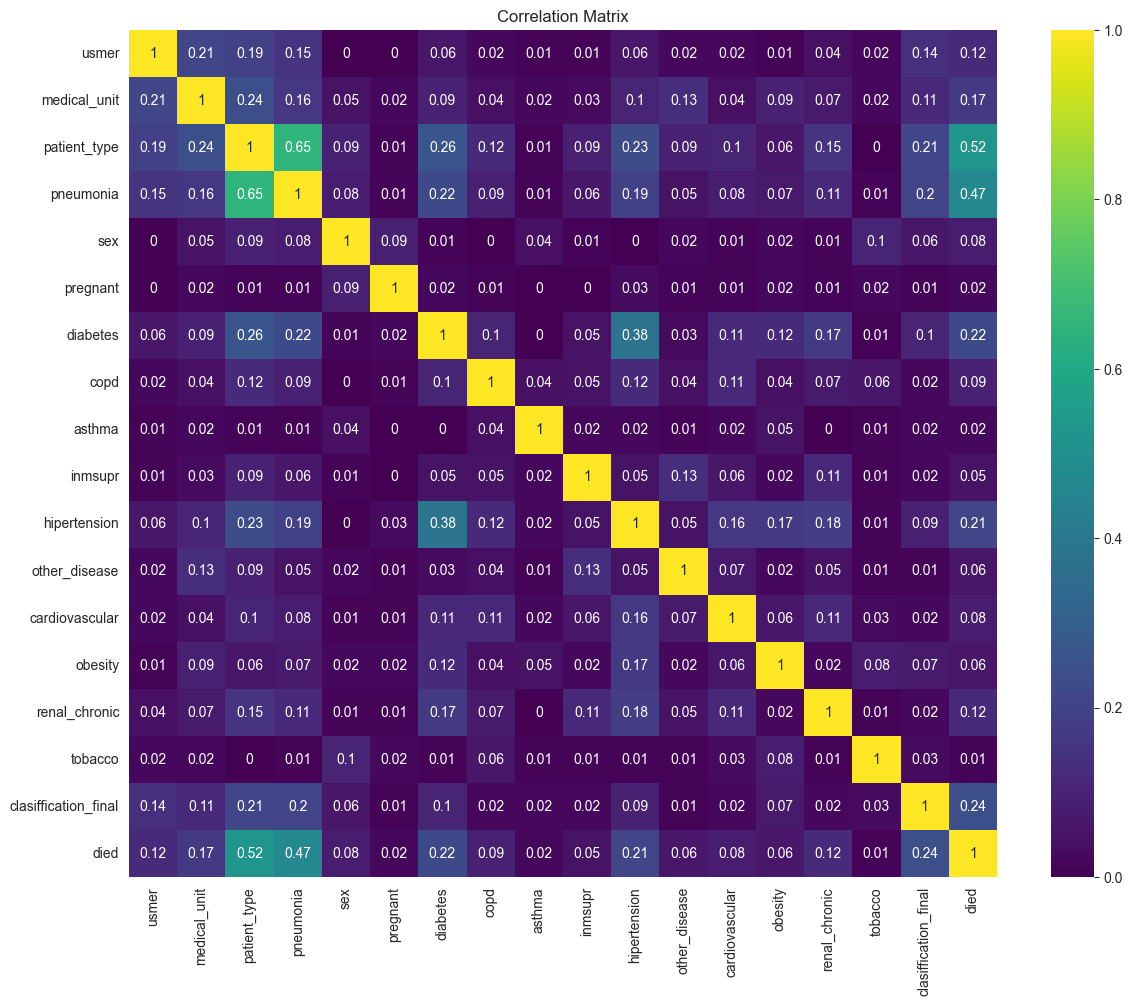

In [37]:
# Plotting the correlation matrix
plt.figure(figsize=(14,11))
sns.heatmap(corr_matrix, cmap='viridis', annot=True)
plt.title("Correlation Matrix");

Patient_type and pneumonia palying major role to classify person will die of not.

### Based on health severity counting death rates.

In [38]:
severity =['pneumonia','diabetes','copd','asthma','hipertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco']
dataset_new[severity]=dataset_new[severity].replace(2,0)

In [39]:
dataset_new['health_severity']=dataset_new['pneumonia']+dataset_new['diabetes']+dataset_new['copd']+dataset_new['asthma']+dataset_new['hipertension']+dataset_new['other_disease']+dataset_new['cardiovascular']+dataset_new['obesity']+dataset_new['renal_chronic']+dataset_new['tobacco']

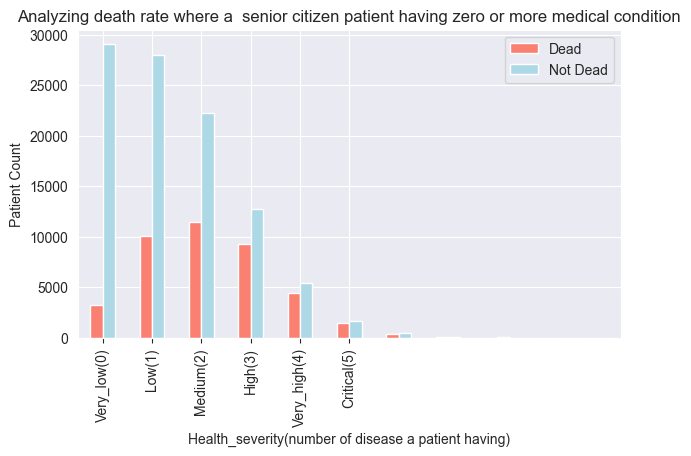

----------------------------------------------------------------------------------------------------------------------------------


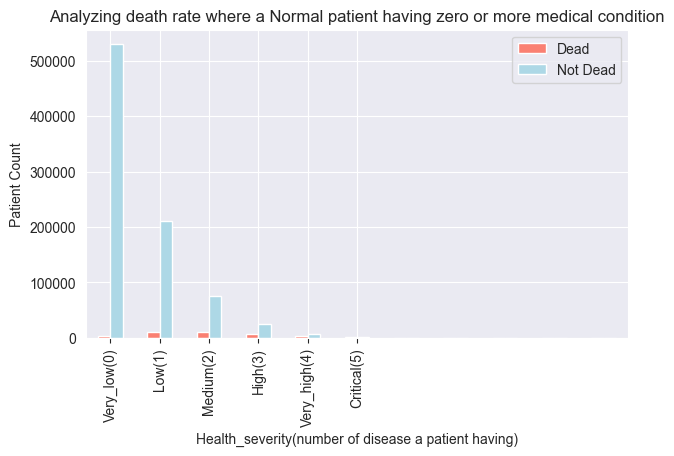

In [40]:
pd.crosstab(dataset_new[dataset_new['age']>60]['health_severity'], dataset_new.died).plot(kind="bar", figsize=(7,4),color=["salmon","lightblue"])
plt.title("Analyzing death rate where a  senior citizen patient having zero or more medical condition")
plt.xlabel('Health_severity(number of disease a patient having)')
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=True)
plt.xticks([0,1,2,3,4,5], ['Very_low(0)','Low(1)','Medium(2)','High(3)','Very_high(4)','Critical(5)'], fontsize=10)
plt.show()
print("----------------------------------------------------------------------------------------------------------------------------------")
pd.crosstab(dataset_new[dataset_new['age']<=60]['health_severity'], dataset_new.died).plot(kind="bar", figsize=(7,4),color=["salmon","lightblue"])
plt.title("Analyzing death rate where a Normal patient having zero or more medical condition")
plt.xlabel('Health_severity(number of disease a patient having)')
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=True)
plt.xticks([0,1,2,3,4,5], ['Very_low(0)','Low(1)','Medium(2)','High(3)','Very_high(4)','Critical(5)'], fontsize=10)
plt.show()

<h3>NORMAL & SENIOR CITIZEN</h3>

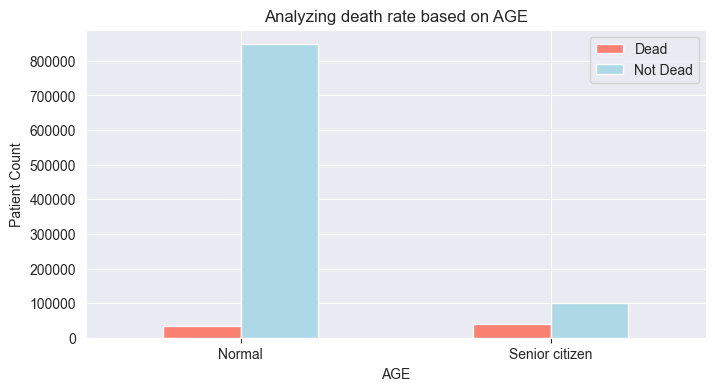

In [41]:
pd.crosstab(dataset_new.age>60, dataset_new.died).plot(kind="bar", figsize=(8,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate based on AGE")
plt.xlabel('AGE')
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=True)
plt.xticks([0,1], ['Normal','Senior citizen'], fontsize=10)
plt.xticks(rotation=0);

### Heath severity vs Hospitalization

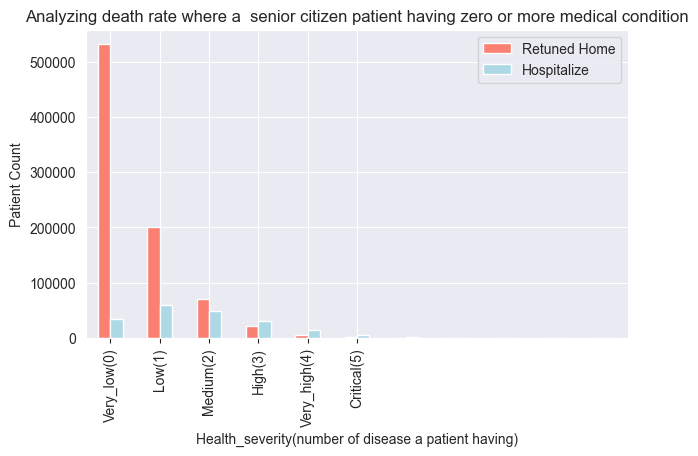

In [42]:
pd.crosstab(dataset_new.health_severity, dataset_new.patient_type).plot(kind="bar", figsize=(7,4),color=["salmon","lightblue"])
plt.title("Analyzing death rate where a  senior citizen patient having zero or more medical condition")
plt.xlabel('Health_severity(number of disease a patient having)')
plt.ylabel("Patient Count")
plt.legend(["Retuned Home", "Hospitalize"])
plt.tick_params(bottom=True)
plt.xticks([0,1,2,3,4,5], ['Very_low(0)','Low(1)','Medium(2)','High(3)','Very_high(4)','Critical(5)'], fontsize=10)
plt.show()

From above visual it is evident that based on health severity the hospitalization rate increases.

---

### Conclusion:

- In the EDA of covid 19 data we observed that more number of medical condition tends to have high death ratio.
- Senior cetizen more prone to death as compared to normal people.
- Covid positive having pneumonia are more prone to death.
- Hospitalization rate increses as the health severity increases.
- Patient_type and pneumonia palying major role to classify person will die of not.
- Hospitalized people more prone to death as comapaired to retured home.
- Death rate of males are more in comparison to females however female patients are slightly more than men patients.
- Patients with classification id as 7 has very less chance of death as they are not the carrier of the virus.
- Most of the deaths occurs between 50 to 70 age so patients within this age range need more attention.

---